# TSNE Plots for Transfer Learning on Large Dataset for VggNet16 and AlexNet

Importing dataset from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download misrakahmed/vegetable-image-dataset

 96% 513M/534M [00:08<00:00, 99.1MB/s]
100% 534M/534M [00:08<00:00, 67.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('vegetable-image-dataset.zip','r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [ ]:
from torchvision import datasets
import os
dataset_dir = '/content/dataset/Vegetable Images'
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, 'train'))
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, 'test'))

# TSNE for VggNET Transfer Learning

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also u

10 / 235
20 / 235
30 / 235
40 / 235
50 / 235
60 / 235
70 / 235
80 / 235
90 / 235
100 / 235
110 / 235
120 / 235
130 / 235
140 / 235
150 / 235
160 / 235
170 / 235
180 / 235
190 / 235
200 / 235
210 / 235
220 / 235
230 / 235
235 / 235
generating t-SNE plot for VGG...
done!


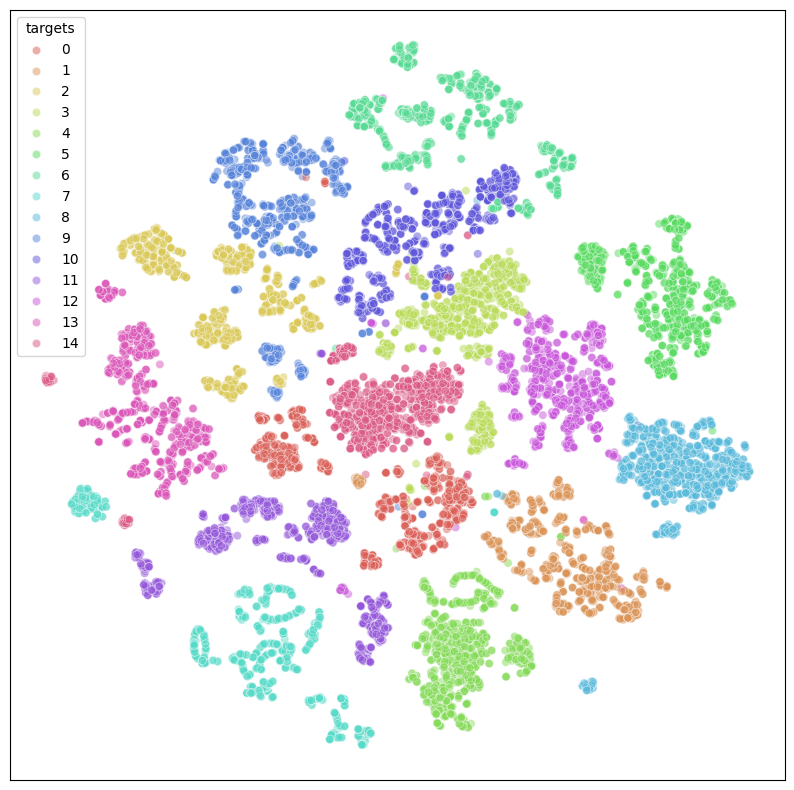

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import os
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets

device = 'cuda' if torch.cuda.is_available() else 'cpu'

seed = 42
batch_size = 64
if device == 'cuda':
    torch.cuda.manual_seed(seed)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

dataset_dir = '/content/dataset/Vegetable Images'
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, 'train'), transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

net = models.vgg16(pretrained=True) # For VggNet Transfer Learning
net = net.to(device)

save_dir = './content/tsne'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

if device == 'cuda':
    net = torch.nn.DataParallel(net)

def gen_features(dataloader):
    net.eval()
    targets_list = []
    outputs_list = []

    with torch.no_grad():
        for idx, (inputs, targets) in enumerate(dataloader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            targets_np = targets.data.cpu().numpy()

            outputs = net(inputs)
            outputs_np = outputs.data.cpu().numpy()

            targets_list.append(targets_np[:, np.newaxis])
            outputs_list.append(outputs_np)

            if ((idx+1) % 10 == 0) or (idx+1 == len(dataloader)):
                print(idx+1, '/', len(dataloader))

    targets = np.concatenate(targets_list, axis=0)
    outputs = np.concatenate(outputs_list, axis=0).astype(np.float64)

    return targets, outputs

def tsne_plot(save_dir, targets, outputs):
    print('generating t-SNE plot for VGG...')
    tsne = TSNE(random_state=0)
    tsne_output = tsne.fit_transform(outputs)

    df = pd.DataFrame(tsne_output, columns=['x', 'y'])
    df['targets'] = targets

    plt.rcParams['figure.figsize'] = 10, 10
    sns.scatterplot(
        x='x', y='y',
        hue='targets',
        palette=sns.color_palette("hls", len(train_dataset.classes)),
        data=df,
        marker='o',
        legend="full",
        alpha=0.5
    )

    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')

    plt.savefig(os.path.join(save_dir,'VGGtsne.png'), bbox_inches='tight')
    print('done!')

targets, outputs = gen_features(train_loader)
tsne_plot(save_dir, targets, outputs)
plt.show()


# TSNE FOR ALEXNET - TRANSFER LEARNING ON LARGE DATASET

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also

10 / 235
20 / 235
30 / 235
40 / 235
50 / 235
60 / 235
70 / 235
80 / 235
90 / 235
100 / 235
110 / 235
120 / 235
130 / 235
140 / 235
150 / 235
160 / 235
170 / 235
180 / 235
190 / 235
200 / 235
210 / 235
220 / 235
230 / 235
235 / 235
generating t-SNE plot for AlexNet...
done!


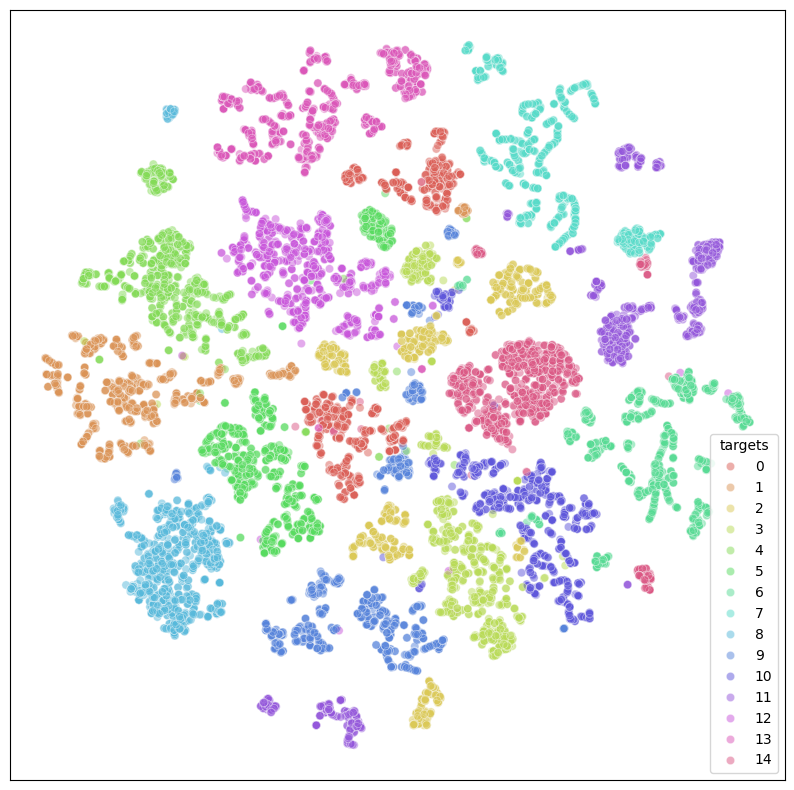

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import os
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets

device = 'cuda' if torch.cuda.is_available() else 'cpu'

seed = 42
batch_size = 64
if device == 'cuda':
    torch.cuda.manual_seed(seed)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

dataset_dir = '/content/dataset/Vegetable Images'
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, 'train'), transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

net = models.alexnet(pretrained=True) # For AlexNet trasnfer learning
net = net.to(device)

save_dir = './content/tsne'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

if device == 'cuda':
    net = torch.nn.DataParallel(net)

def gen_features(dataloader):
    net.eval()
    targets_list = []
    outputs_list = []

    with torch.no_grad():
        for idx, (inputs, targets) in enumerate(dataloader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            targets_np = targets.data.cpu().numpy()

            outputs = net(inputs)
            outputs_np = outputs.data.cpu().numpy()

            targets_list.append(targets_np[:, np.newaxis])
            outputs_list.append(outputs_np)

            if ((idx+1) % 10 == 0) or (idx+1 == len(dataloader)):
                print(idx+1, '/', len(dataloader))

    targets = np.concatenate(targets_list, axis=0)
    outputs = np.concatenate(outputs_list, axis=0).astype(np.float64)

    return targets, outputs

def tsne_plot(save_dir, targets, outputs):
    print('generating t-SNE plot for AlexNet...')
    tsne = TSNE(random_state=0)
    tsne_output = tsne.fit_transform(outputs)

    df = pd.DataFrame(tsne_output, columns=['x', 'y'])
    df['targets'] = targets

    plt.rcParams['figure.figsize'] = 10, 10
    sns.scatterplot(
        x='x', y='y',
        hue='targets',
        palette=sns.color_palette("hls", len(train_dataset.classes)),
        data=df,
        marker='o',
        legend="full",
        alpha=0.5
    )

    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')

    plt.savefig(os.path.join(save_dir,'AlexNetTSNE.png'), bbox_inches='tight')
    print('done!')

targets, outputs = gen_features(train_loader)
tsne_plot(save_dir, targets, outputs)
plt.show()


# FLOPS CALCULATION OF RESNET and AlexNet

In [ ]:
!pip install thop

In [ ]:
import torch
from torchvision.models import alexnet
from thop import profile

model = alexnet(pretrained=False)

def count_flops(model, input_size):
    input = torch.randn(1, *input_size)
    flops, params = profile(model, inputs=(input,))
    print(f"FLOPs: {flops}")

count_flops(model, (3, 224, 224))


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
FLOPs: 714206912.0
